In [16]:
from logging import getLogger
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [17]:
df = pd.read_csv('../data/9_Goffredo_used_in_MAFALDA_cleaned.csv')

In [18]:
df.head()

,Year,Date,SectionID,text,fallacy,subcategory,Speaker,real_date
0,1992,15Oct,7,"And I think you get a certain arrogance, burea...",Ad Hominem,Ad Hominem,BUSH,15 10 1992
1,1992,13Oct,8,Bill Clinton simply has trouble telling the tr...,Ad Hominem,Ad Hominem,QUAYLE,13 10 1992
2,2016,26Sep,3,he has a long record of engaging in racist beh...,Ad Hominem,Ad Hominem,CLINTON,26 9 2016
3,2016,26Sep,5,she's got no business ability,Ad Hominem,Ad Hominem,TRUMP,26 9 2016
4,2016,26Sep,5,she doesn't have that,Ad Hominem,Ad Hominem,TRUMP,26 9 2016


In [19]:
    # define target and features
    Y = df["fallacy"]
    X = df["text"]

In [20]:
Y.unique()

array(['Ad Hominem', 'Appeal to Emotion', 'Appeal to Authority',
       'Slippery Slope', 'False Cause', 'Slogans'], dtype=object)

In [21]:
Y

0       Ad Hominem
1       Ad Hominem
2       Ad Hominem
3       Ad Hominem
4       Ad Hominem
           ...    
1670       Slogans
1671       Slogans
1672       Slogans
1673    Ad Hominem
1674    Ad Hominem
Name: fallacy, Length: 1675, dtype: object

In [22]:
    # splitting into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.30, random_state=42
    )

In [23]:
type(y_train)

pandas.core.series.Series

In [24]:
#define baseline model
import random 

# y_train_pred = []
# for _ in range(len(y_train)):
#     random_choice = random.choice(y_train)
#     y_train_pred.append(random_choice)

y_train_list = y_train.tolist()
y_test_list = y_test.tolist()

y_train_pred = random.choices(y_train_list, k=len(y_train))
y_test_pred = random.choices(y_train_list, k=len(y_test))

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

                     precision    recall  f1-score   support

         Ad Hominem       0.18      0.16      0.17       154
Appeal to Authority       0.14      0.14      0.14       156
  Appeal to Emotion       0.64      0.64      0.64       727
        False Cause       0.03      0.04      0.04        54
     Slippery Slope       0.02      0.02      0.02        43
            Slogans       0.03      0.03      0.03        38

           accuracy                           0.44      1172
          macro avg       0.17      0.17      0.17      1172
       weighted avg       0.44      0.44      0.44      1172



In [27]:
print(classification_report(y_test, y_test_pred))

                     precision    recall  f1-score   support

         Ad Hominem       0.17      0.22      0.19        50
Appeal to Authority       0.16      0.17      0.17        75
  Appeal to Emotion       0.66      0.62      0.64       325
        False Cause       0.10      0.09      0.09        23
     Slippery Slope       0.00      0.00      0.00        16
            Slogans       0.00      0.00      0.00        14

           accuracy                           0.45       503
          macro avg       0.18      0.18      0.18       503
       weighted avg       0.47      0.45      0.46       503



[[ 11   5  28   1   3   2]
 [  8  13  44   4   2   4]
 [ 36  55 200  12   8  14]
 [  2   3  13   2   0   3]
 [  4   2  10   0   0   0]
 [  3   3   7   1   0   0]]


Text(50.722222222222214, 0.5, 'actual')

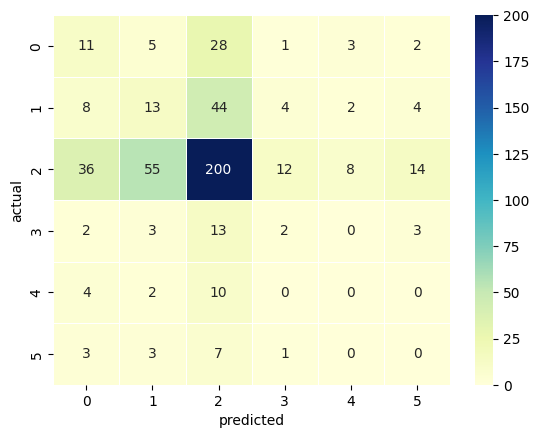

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

print(confusion_matrix(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);
plt.xlabel("predicted")
plt.ylabel("actual")

[[ 25  20  89   5   9   6]
 [ 19  22  91  10   8   6]
 [ 78  95 467  39  21  27]
 [  5  12  33   2   2   0]
 [  6   6  28   2   1   0]
 [  4   6  24   2   1   1]]


Text(50.722222222222214, 0.5, 'actual')

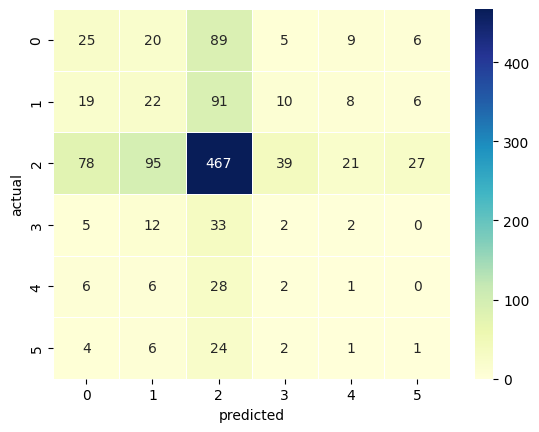

In [40]:
print(confusion_matrix(y_train, y_train_pred))
cm = confusion_matrix(y_train, y_train_pred)

sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);
plt.xlabel("predicted")
plt.ylabel("actual")